In [1]:
from countcoins.config import df_annotations_path
from countcoins.data.IO import read_df_annotation, read_image
from countcoins.data.preprocess import add_split_column
from countcoins.visualization import visualize_distributions
from countcoins.config import data_path, models_path
from countcoins.modelling.classical_cv import ClassicalCVModel
from countcoins.modelling.deep_learning import TrainedDeepLearningModel
import os

Using MPS


In [2]:
# Params to select one image sample
idx_image = 4
currency = 'euro_coins'


# Classical Computer Vision model
cv_model = ClassicalCVModel()

# Deep Learning model (you should first train a model)
experiment_name = 'experiment_1'
dl_model = TrainedDeepLearningModel(models_path=models_path, experiment_name=experiment_name)

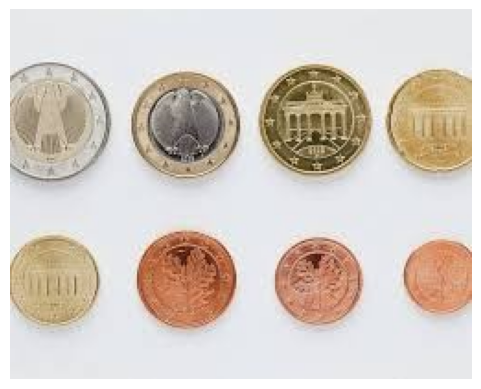

In [3]:
df_annotations = read_df_annotation(df_annotations_path)

image_series = df_annotations.query("currencies==@currency").iloc[idx_image]
image_path = os.path.join(data_path, 'coins_images', currency, image_series.name)
y_true = image_series.coins_count

_ = read_image(image_path, plot_image=True)

## Prediction using the Classical Computer Vision Model

True coins count: 8, Predicted coins count (CV based Model): 4


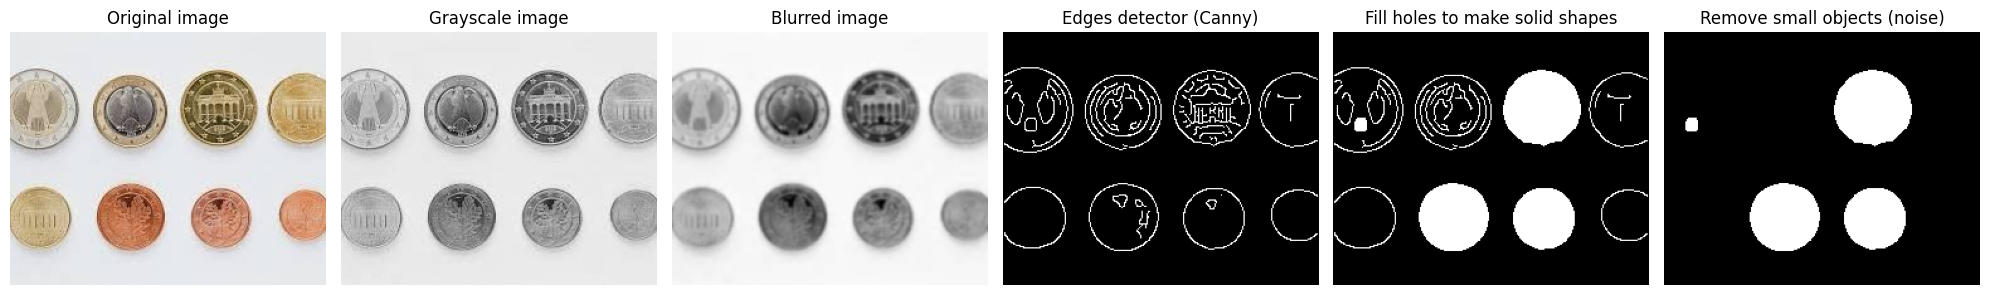

In [4]:
y_pred_cv = cv_model.predict(image_path=image_path, generate_plots=True)

print(f'True coins count: {y_true}, Predicted coins count (CV based Model): {y_pred_cv}')

## Prediction using the trained Deep Learning Model

In [5]:
y_pred_dl = dl_model.predict(image_path=image_path, generate_plots=True)

print(f'True coins count: {y_true}, Predicted coins count (DL based model): {round(y_pred_dl)}')

True coins count: 8, Predicted coins count (DL based model): 8
